In [1]:
#importing yahoo finance api to download daily stock and index prices.
import yfinance as yf
import pandas as pd


In [2]:
pd.sp500 = yf.Ticker("^GSPC") #Initializing ticker class, which enables to download price history for single symbol i.e here GSPC which is sp500 index

In [3]:
pd.sp500 = pd.sp500.history(period="max") #querying all data from thje begining when the index was created.

In [4]:
#accessing historical data
pd.sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,0.0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,0.0
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,0.0


In [5]:
pd.sp500.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


In [6]:
pd.sp500.index


DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-02-26 00:00:00-05:00', '2024-02-27 00:00:00-05:00',
               '2024-02-28 00:00:00-05:00', '2024-02-29 00:00:00-05:00',
               '2024-03-01 00:00:00-05:00', '2024-03-04 00:00:00-05:00',
               '2024-03-05 00:00:00-05:00', '2024-03-06 00:00:00-05:00',
               '2024-03-07 00:00:00-05:00', '2024-03-08 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24162, freq=None)

<Axes: xlabel='Date'>

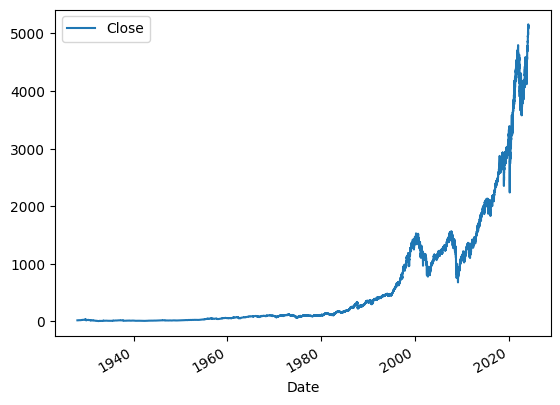

In [7]:
#ETL and Visualizing
pd.sp500.plot.line(y="Close",use_index=True)

In [8]:
#cleaning the sp500 unused columuns
del pd.sp500["Dividends"]


In [9]:
#Setting up target variable that we will be using for stock market prediction : rather than predciting the absolute price at the start of the day tommorow its better to predict wether the price is gonna be high or low.
#creating a new variable Tomorrow for predcition
pd.sp500["Tomorrow"] = pd.sp500["Close"].shift(-1) #using shift to move the prices back by one day



In [10]:
pd.sp500

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.500000
...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,5078.649902
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,5104.759766
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,5157.359863


In [11]:
#creating our target variable based
pd.sp500["Target"] = (pd.sp500["Tomorrow"]>pd.sp500["Close"]).astype(int)

In [12]:
pd.sp500

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,17.500000,0
...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,5078.649902,0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,5104.759766,1
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,5157.359863,1


In [13]:
pd.sp500 =pd.sp500.loc["1990-01-01":].copy()

In [14]:
pd.sp500

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target
Date,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0.0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0.0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0.0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0.0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0.0,349.619995,0
...,...,...,...,...,...,...,...,...
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,5078.649902,0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,5104.759766,1
2024-03-06 00:00:00-05:00,5108.029785,5127.970215,5092.220215,5104.759766,4559050000,0.0,5157.359863,1


In [15]:
#Running first machine learning model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)#decision trees ahve tendency to overfit hence mean sample split is used to avoid overfitting, higher the split lesser the accurate the model is, but it will avoid over fitting.

#in time series leakage can happen, that is leaking future information to model hence avoid cross validation cause it will do horribly in actual world or real time

train = pd.sp500.iloc[:-100]
test = pd.sp500.iloc[-100:]

predictors = ["Close","Open","High","Low","Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [17]:
preds

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
preds = pd.Series(preds, index = test.index) #to see prediction as our index i.e date for easier understanding

In [19]:
preds

Date
2023-10-16 00:00:00-04:00    1
2023-10-17 00:00:00-04:00    1
2023-10-18 00:00:00-04:00    1
2023-10-19 00:00:00-04:00    1
2023-10-20 00:00:00-04:00    1
                            ..
2024-03-04 00:00:00-05:00    0
2024-03-05 00:00:00-05:00    0
2024-03-06 00:00:00-05:00    0
2024-03-07 00:00:00-05:00    0
2024-03-08 00:00:00-05:00    0
Length: 100, dtype: int64

In [20]:
precision_score(test["Target"], preds)

0.52

In [21]:
combined = pd.concat([test["Target"],preds],axis = 1)

<Axes: xlabel='Date'>

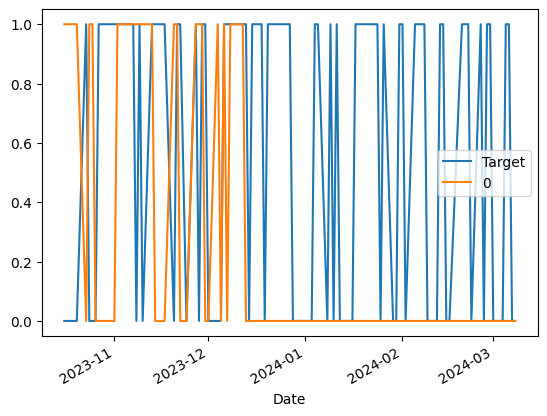

In [22]:
combined.plot()

In [23]:
#creating a backtesting system
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name="Predictions")
  combined = pd.concat([test["Target"],preds],axis = 1)
  return combined


In [24]:
def backtest(data, model, predictors, start=2500, step = 250): #do training for first 10 years and predict 11th with iteration
 all_predictions = []

 for  i in range(start, data.shape[0], step):
  train = data.iloc[0:i].copy()
  test =data.iloc[i:(i+step)].copy()
  predictions = predict(train, test, predictors, model)
  all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [25]:
predictions = backtest(pd.sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

0    238
1     12
Name: Predictions, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.516
1    0.484
Name: Target, dtype: float64

In [29]:

horizons = [2, 5, 60, 250, 1000]  # looking at rolling means of closing price over last 2 days, 5 days, 60 days, and so on..
new_predictors = []

for horizon in horizons:
    rolling_averages = pd.sp500['Close'].rolling(window=horizon).mean()

    ratio_column = f"Close_ratio_{horizon}_day"
    pd.sp500[ratio_column] = pd.sp500["Close"] / rolling_averages

    trend_column = f"Trend_{horizon}"
    pd.sp500[trend_column] = pd.sp500["Target"].shift(1).rolling(window=horizon).sum()

    new_predictors += [ratio_column, trend_column]


In [30]:
pd.sp500 = pd.sp500.dropna()

In [31]:
pd.sp500

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target,Close_ratio_2_day,Trend_2,Close_ratio_5_day,Trend_5,Close_ratio_60_day,Trend_60,Close_ratio_250_day,Trend_250,Close_ratio_1000_day,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0.0,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,0.0,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,0.0,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0.0,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0.0,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01 00:00:00-05:00,5098.509766,5140.330078,5094.160156,5137.080078,4748110000,0.0,5130.950195,0,1.003988,2.0,1.009217,3.0,1.059894,38.0,1.158568,141.0,1.270850,534.0
2024-03-04 00:00:00-05:00,5130.990234,5149.669922,5127.180176,5130.950195,4758440000,0.0,5078.649902,0,0.999403,1.0,1.005586,3.0,1.056581,38.0,1.156057,140.0,1.268502,534.0
2024-03-05 00:00:00-05:00,5110.520020,5114.540039,5056.819824,5078.649902,4418410000,0.0,5104.759766,1,0.994877,0.0,0.995318,2.0,1.043915,38.0,1.143148,140.0,1.254837,533.0


In [32]:
#Improving the previous model
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [33]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]#predicting probablity
  preds[preds >= .6] = 1 #setting treshold to 60% rather than 50%
  preds[preds < .6] = 0
  preds = pd.Series(preds, index = test.index, name="Predictions")
  combined = pd.concat([test["Target"],preds],axis = 1)
  return combined

In [34]:
predictions = backtest(pd.sp500, model, new_predictors)

In [35]:
predictions["Predictions"].value_counts()

0.0    207
1.0     43
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5813953488372093

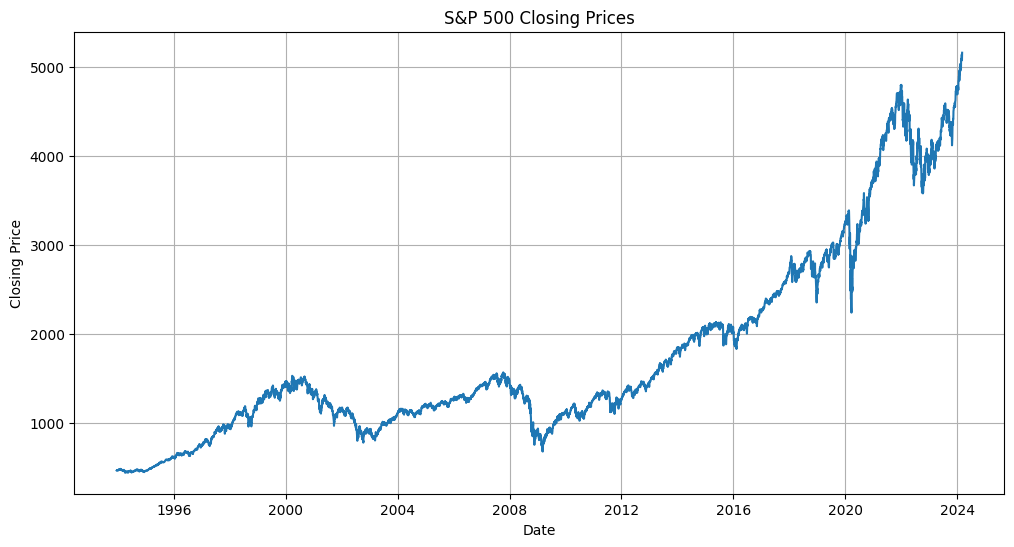

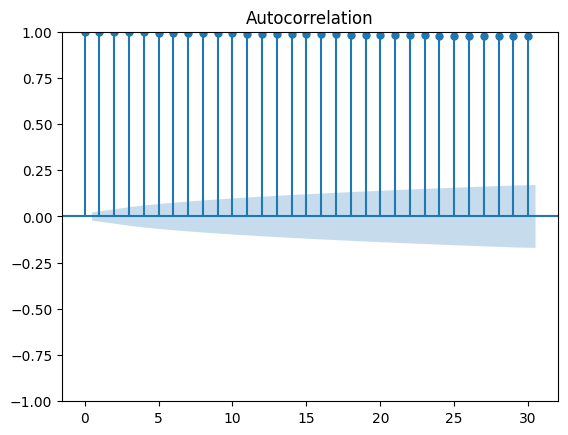

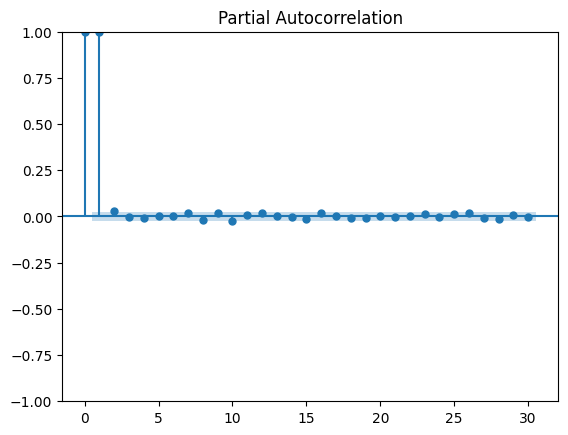

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 7611
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -34655.151
Date:                Sun, 10 Mar 2024   AIC                          69316.302
Time:                        04:36:55   BIC                          69337.114
Sample:                             0   HQIC                         69323.443
                               - 7611                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2889      0.040     -7.246      0.000      -0.367      -0.211
ma.L1          0.2039      0.041      4.926      0.000       0.123       0.285
sigma2       528.5166      2.838    186.235      0.0

In [37]:

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'Close' column to a time series
time_series = pd.sp500['Close']

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(time_series)
plt.title('S&P 500 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plot the ACF and PACF to determine the parameters for ARIMA
plot_acf(time_series, lags=30)
plt.show()

plot_pacf(time_series, lags=30)
plt.show()

# Determine the order (p, d, q) for ARIMA
# You can visually inspect the plots to determine the order

# Fit the ARIMA model
p = 1  # AR order
d = 1  # Differencing order
q = 1  # MA order

model = ARIMA(time_series, order=(p, d, q))
results = model.fit()

# Print summary of the ARIMA model
print(results.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


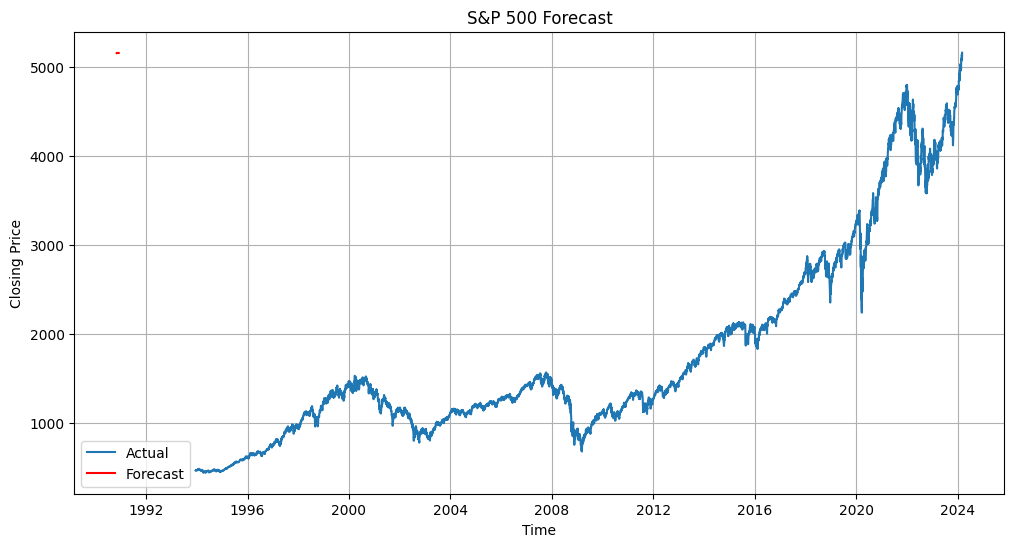

In [38]:
import numpy as np
# Forecast the next 'n' time steps
n = 30
forecast = results.forecast(steps=n)

# Plot the forecasted values along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual')
plt.plot(np.arange(len(time_series), len(time_series) + n), forecast, label='Forecast', color='red')
plt.title('S&P 500 Forecast')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'actual_values' is the actual time series data
# You already have 'forecast' which contains the forecasted values

# Assuming you have 'time_series' as the actual time series data
actual_values = time_series[-n:]  # Select the last 'n' actual values

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, forecast)
print("Mean Absolute Error (MAE):", mae)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, forecast)
print("Mean Squared Error (MSE):", mse)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 143.49941097804094
Mean Squared Error (MSE): 26983.529950290722
Root Mean Squared Error (RMSE): 164.26664284111587
